Ethan Tobey

# Investigation of Neural Networks on Iris Dataset

# Initial Setup

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

### Set Up Data

In [2]:
df = pd.read_csv('irisdata.csv')   #read the CSV

#encode Species column data as 0, 1, or 2
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
species_name = encoder.classes_

#put into X and Y
X = df.drop(columns=['species'])  # get rid of id and species in X data
y = df['species']   # the species names only

### Divide into Testing and Training Set

In [3]:
from sklearn.model_selection import train_test_split

#use 30% of total data for test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

### Scale data values to improve performance speed

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#let's see x before the scaling
print(x_train[:5])

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#and now let's see x after the scaling
print(x_train[:5])

     sepal_length  sepal_width  petal_length  petal_width
113           5.7          2.5           5.0          2.0
128           6.4          2.8           5.6          2.1
17            5.1          3.5           1.4          0.3
112           6.8          3.0           5.5          2.1
125           7.2          3.2           6.0          1.8
[[-0.16221434 -1.33966088  0.67423804  0.96701228]
 [ 0.68337103 -0.62320387  1.00739095  1.09441039]
 [-0.88700179  1.04852914 -1.32467944 -1.1987555 ]
 [ 1.16656267 -0.14556587  0.95186547  1.09441039]
 [ 1.64975431  0.33207214  1.2294929   0.71221607]]


## Send the encoded classes to a matrix

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)

# Initial Model

### Define the model
We will start by examining a model that uses a Sigmoid nonlinearity, Gradient Descent learning, and Mean Squared Error objective function like in Homework 9.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

model = Sequential()

#define Input layer
model.add(Dense(units=32, activation='sigmoid', input_shape=(x_train.shape[-1], )))

#define a hidden layer
model.add(Dense(units=32, activation='sigmoid'))

#now let's add the output layer 
    #units=3 b/c couuld be one of 3 flower types
model.add(Dense(units=3, activation='softmax')) #softmax is a function good for sorting into more than two classes


#Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])
#let's see the info of our model
model.summary()

C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

### Now train the model
We will use early stopping to help determine how many epochs to train the model for

In [7]:
#epochs is how many training passes to do over entire training set

from keras.callbacks import EarlyStopping

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=5000, verbose=2, callbacks=[early_stopping])

Epoch 1/5000
4/4 - 1s - 226ms/step - accuracy: 0.3333 - loss: 0.2342
Epoch 2/5000
4/4 - 0s - 40ms/step - accuracy: 0.3333 - loss: 0.2341
Epoch 3/5000
4/4 - 0s - 24ms/step - accuracy: 0.3333 - loss: 0.2339
Epoch 4/5000
4/4 - 0s - 19ms/step - accuracy: 0.3333 - loss: 0.2338
Epoch 5/5000
4/4 - 0s - 17ms/step - accuracy: 0.3333 - loss: 0.2336
Epoch 6/5000
4/4 - 0s - 18ms/step - accuracy: 0.3333 - loss: 0.2334
Epoch 7/5000
4/4 - 0s - 16ms/step - accuracy: 0.3333 - loss: 0.2333
Epoch 8/5000
4/4 - 0s - 20ms/step - accuracy: 0.3333 - loss: 0.2329
Epoch 9/5000
4/4 - 0s - 21ms/step - accuracy: 0.3333 - loss: 0.2327
Epoch 10/5000
4/4 - 0s - 17ms/step - accuracy: 0.3333 - loss: 0.2325
Epoch 11/5000
4/4 - 0s - 18ms/step - accuracy: 0.3333 - loss: 0.2323
Epoch 12/5000
4/4 - 0s - 19ms/step - accuracy: 0.3333 - loss: 0.2321
Epoch 13/5000
4/4 - 0s - 18ms/step - accuracy: 0.3333 - loss: 0.2319
Epoch 14/5000
4/4 - 0s - 18ms/step - accuracy: 0.3333 - loss: 0.2317
Epoch 15/5000
4/4 - 0s - 20ms/step - accur

### Now lets use our test dataset to check our model

In [8]:
#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: [2 0 0 0 0]
Real values:
 140    2
37     0
5      0
24     0
41     0
Name: species, dtype: int64


### Let's check some analysis of how well the model performs

Accuracy Score: 0.9111111111111111
Confusion Matrix:
 [[15  0  0]
 [ 0 15  4]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'Actual')

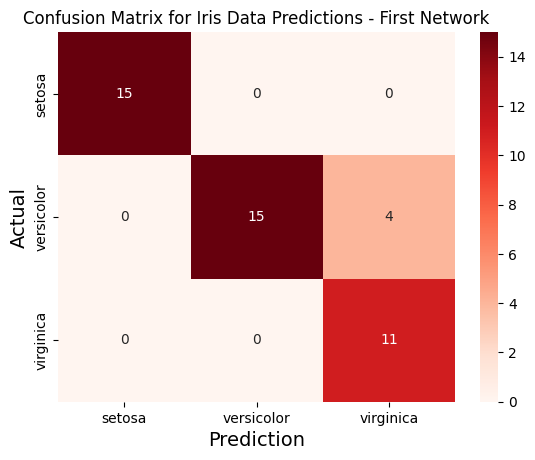

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions - First Network')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)

### Convergence graph from training

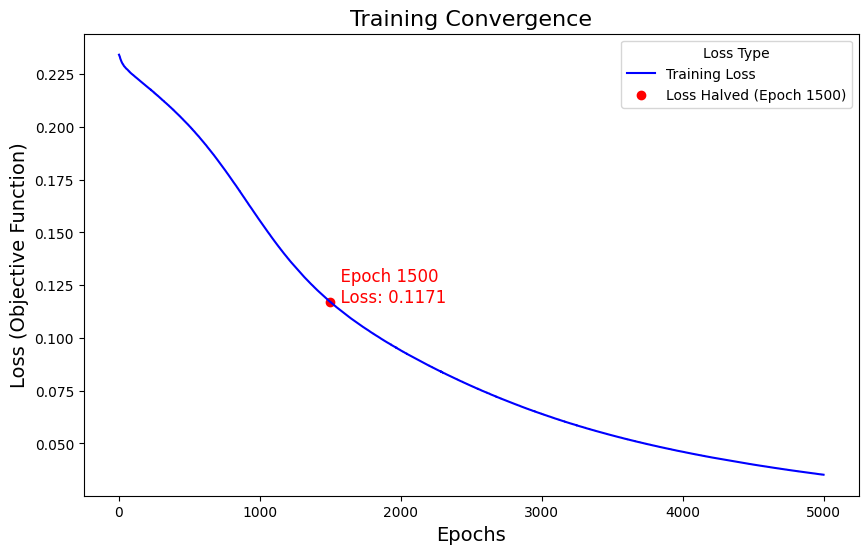

In [10]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Calculate what half of initial loss is
initial_loss = history_df['loss'].iloc[0]
target_loss = initial_loss / 2

#Find epoch number where loss was halved
halved_epoch = None
for i, loss in enumerate(history_df['loss']):
    if loss <= target_loss:
        halved_epoch = history_df['epoch'].iloc[i]
        halved_loss = loss
        break

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

#Annotate epoch on graph where loss is halved
if halved_epoch:
    plt.scatter(halved_epoch, halved_loss, color='red', label=f'Loss Halved (Epoch {halved_epoch})')
    plt.text(halved_epoch, halved_loss, f"  Epoch {halved_epoch}\n  Loss: {halved_loss:.4f}", 
             color='red', fontsize=12)

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()

### Summary

Our initial model, built with one hidden layer and using a Sigmoid Nonlinearity, Gradient Descent learning function, and Mean Squared Error objective function was able to train up to 96.17% accuracy on the training data, and 97.77% accuracy on the test data. The training took 5000 epochs, with loss being decreased by 50% after 1491 epochs.

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

# Explore Different Nonlinearities

We will now attempt retraining the model with different nonlinearities.

## Rectified Linear Unit (ReLU) Nonlinearity

ReLU is a nonlinearity defined by the formula f(x) = max(0, x). It is computationally efficient, and avoids the vanishing gradient problem that can occur in Sigmoid nonlinearities.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

model = Sequential()

#define Input layer
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))

#define a hidden layer
model.add(Dense(units=32, activation='relu'))

#now let's add the output layer 
    #units=3 b/c couuld be one of 3 flower types
model.add(Dense(units=3, activation='softmax'))  #softmax is a function good for sorting into more than two classes

#Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])


#TRAINING MODEL
from keras.callbacks import EarlyStopping

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, verbose=2, callbacks=[early_stopping])

Epoch 1/1000


C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 170ms/step - accuracy: 0.6190 - loss: 0.1989
Epoch 2/1000
4/4 - 0s - 18ms/step - accuracy: 0.6476 - loss: 0.1978
Epoch 3/1000
4/4 - 0s - 18ms/step - accuracy: 0.6381 - loss: 0.1966
Epoch 4/1000
4/4 - 0s - 18ms/step - accuracy: 0.6476 - loss: 0.1955
Epoch 5/1000
4/4 - 0s - 21ms/step - accuracy: 0.6571 - loss: 0.1944
Epoch 6/1000
4/4 - 0s - 18ms/step - accuracy: 0.6571 - loss: 0.1933
Epoch 7/1000
4/4 - 0s - 18ms/step - accuracy: 0.6571 - loss: 0.1923
Epoch 8/1000
4/4 - 0s - 19ms/step - accuracy: 0.6571 - loss: 0.1913
Epoch 9/1000
4/4 - 0s - 18ms/step - accuracy: 0.6571 - loss: 0.1901
Epoch 10/1000
4/4 - 0s - 18ms/step - accuracy: 0.6667 - loss: 0.1891
Epoch 11/1000
4/4 - 0s - 20ms/step - accuracy: 0.6667 - loss: 0.1881
Epoch 12/1000
4/4 - 0s - 21ms/step - accuracy: 0.6762 - loss: 0.1871
Epoch 13/1000
4/4 - 0s - 20ms/step - accuracy: 0.6762 - loss: 0.1859
Epoch 14/1000
4/4 - 0s - 18ms/step - accuracy: 0.6762 - loss: 0.1848
Epoch 15/1000
4/4 - 0s - 19ms/step - accuracy: 0.6762 -

### Now let's check our ReLU model against the test data, and make a Convergence Graph

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction: [2 0 0 0 0]
Real values:
 140    2
37     0
5      0
24     0
41     0
Name: species, dtype: int64
Accuracy Score: 0.9111111111111111
Confusion Matrix:
 [[15  0  0]
 [ 0 17  2]
 [ 0  2  9]]


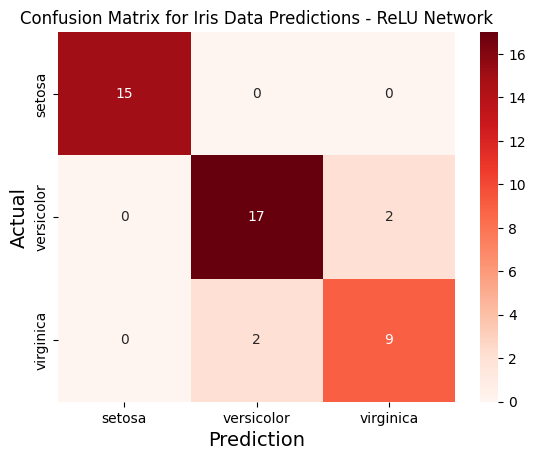

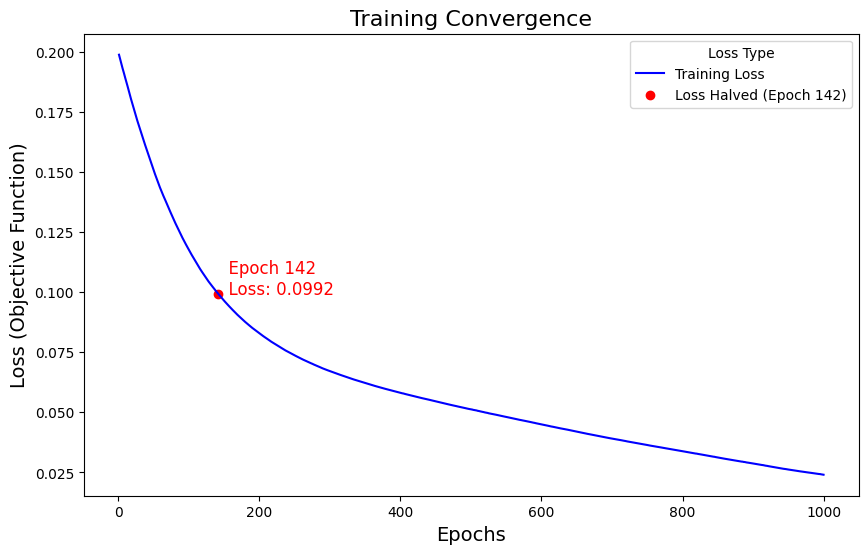

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions - ReLU Network')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)


#MAKE CONVERGENCE GRAPH

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Calculate what half of initial loss is
initial_loss = history_df['loss'].iloc[0]
target_loss = initial_loss / 2

#Find epoch number where loss was halved
halved_epoch = None
for i, loss in enumerate(history_df['loss']):
    if loss <= target_loss:
        halved_epoch = history_df['epoch'].iloc[i]
        halved_loss = loss
        break

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

#Annotate epoch on graph where loss is halved
if halved_epoch:
    plt.scatter(halved_epoch, halved_loss, color='red', label=f'Loss Halved (Epoch {halved_epoch})')
    plt.text(halved_epoch, halved_loss, f"  Epoch {halved_epoch}\n  Loss: {halved_loss:.4f}", 
             color='red', fontsize=12)

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()

### ReLU Summary

Our ReLU model, built in the same way as the initial model, except with a ReLU nonlinearity, still using a Gradient Descent learning function and Mean Squared Error objective function was able to train up to 95.24% accuracy on the training data, and 95.55% accuracy on the test data. The training took 1000 epochs, with loss being decreased by 50% after 136 epochs.

In direct comparison with the Sigmoid nonlinearity, it can be observed that the ReLU function was able to decrease the loss by 50% over 10 times faster than the Sigmoid (136 epochs compared to 1491). The complete ReLU training also took place over only 1000 epochs compared to the Sigmoid's 5000. The Sigmoid model did achieve higher accuracy scores by a slim margin, but it stands to reason that if the ReLU were trained for longer, that advantage would likely lessen or disappear.

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

## Leaky ReLU Nonlinearity

The ReLU model performed better than the Sigmoid model. However, it can likely still be optimized further. The ReLU function often suffers from the 'Dead Neurons' problem, where neurons become inactive during training. Leaky ReLU seeks to solve this problem by using a non-zero gradient for inputs that are less than 0, which prevents neurons from becoming completely inactive. Leaky ReLU is often used in deep networks with better results than standard ReLU.

### Train Leaky ReLU Model (with Gradient Descent, Mean Squared Error)

In [13]:
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()

#define Input layer
model.add(Dense(units=32, input_shape=(x_train.shape[-1],)))
model.add(LeakyReLU(alpha=0.01))  # Adding LeakyReLU activation

#define a hidden layer
model.add(Dense(units=32))
model.add(LeakyReLU(alpha=0.01))  # Adding LeakyReLU activation

#now let's add the output layer 
    #units=3 b/c couuld be one of 3 flower types
model.add(Dense(units=3, activation='softmax')) #softmax is a function good for sorting into more than two classes

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])


#TRAINING MODEL
from keras.callbacks import EarlyStopping

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, verbose=2, callbacks=[early_stopping])


Epoch 1/1000


C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 - 1s - 167ms/step - accuracy: 0.2667 - loss: 0.2255
Epoch 2/1000
4/4 - 0s - 20ms/step - accuracy: 0.2667 - loss: 0.2228
Epoch 3/1000
4/4 - 0s - 18ms/step - accuracy: 0.2476 - loss: 0.2205
Epoch 4/1000
4/4 - 0s - 20ms/step - accuracy: 0.2762 - loss: 0.2180
Epoch 5/1000
4/4 - 0s - 18ms/step - accuracy: 0.3048 - loss: 0.2155
Epoch 6/1000
4/4 - 0s - 18ms/step - accuracy: 0.3048 - loss: 0.2129
Epoch 7/1000
4/4 - 0s - 20ms/step - accuracy: 0.3143 - loss: 0.2104
Epoch 8/1000
4/4 - 0s - 20ms/step - accuracy: 0.3429 - loss: 0.2079
Epoch 9/1000
4/4 - 0s - 16ms/step - accuracy: 0.3619 - loss: 0.2055
Epoch 10/1000
4/4 - 0s - 19ms/step - accuracy: 0.3905 - loss: 0.2032
Epoch 11/1000
4/4 - 0s - 18ms/step - accuracy: 0.4381 - loss: 0.2009
Epoch 12/1000
4/4 - 0s - 20ms/step - accuracy: 0.5333 - loss: 0.1985
Epoch 13/1000
4/4 - 0s - 22ms/step - accuracy: 0.5714 - loss: 0.1963
Epoch 14/1000
4/4 - 0s - 18ms/step - accuracy: 0.5810 - loss: 0.1942
Epoch 15/1000
4/4 - 0s - 18ms/step - accuracy: 0.5810 -

### Evaluate Leaky ReLU Model

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000278E700EF20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: [2 0 0 0 1]
Real values:
 140    2
37     0
5      0
24     0
41     0
Name: species, dtype: int64
Accuracy Score: 0.9111111111111111
Confusion Matrix:
 [[14  1  0]
 [ 0 17  2]
 [ 0  1 10

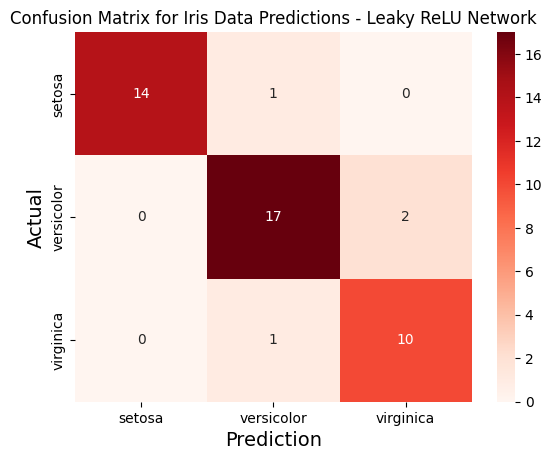

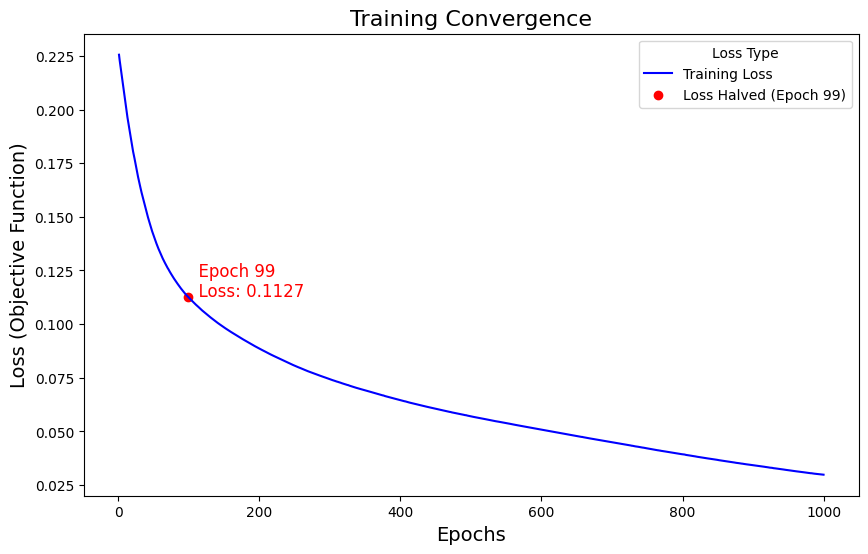

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions - Leaky ReLU Network')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)


#MAKE CONVERGENCE GRAPH

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Calculate what half of initial loss is
initial_loss = history_df['loss'].iloc[0]
target_loss = initial_loss / 2

#Find epoch number where loss was halved
halved_epoch = None
for i, loss in enumerate(history_df['loss']):
    if loss <= target_loss:
        halved_epoch = history_df['epoch'].iloc[i]
        halved_loss = loss
        break

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

#Annotate epoch on graph where loss is halved
if halved_epoch:
    plt.scatter(halved_epoch, halved_loss, color='red', label=f'Loss Halved (Epoch {halved_epoch})')
    plt.text(halved_epoch, halved_loss, f"  Epoch {halved_epoch}\n  Loss: {halved_loss:.4f}", 
             color='red', fontsize=12)

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()

### Leaky ReLU Summary

Our Leaky ReLU model, built in the same way as the previous model, except with a Leaky ReLU nonlinearity, still using a Gradient Descent learning function and Mean Squared Error objective function was able to train up to 96.19% accuracy on the training data, and 95.55% accuracy on the test data. The training took 1000 epochs, with loss being decreased by 50% after 144 epochs.

In direct comparison with the standard ReLU nonlinearity, there were no observable gains in performance by using Leaky ReLU. Both models took a similar number of epochs to decrease loss by 50% (144 vs 136), and both trained to similar degrees of accuracy. 

This implies that the 'Dead Neurons' problem was not occuring in the previous model, or at least was not a significant detractor from the model's performance. As a result, for further investigation, we will continue to consider the standard ReLU model rather than the Leaky ReLU model.

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

## Swish Nonlinearity

The Swish nonlinearity is a relatively newer function in the world of artificial intelligence. It was developed by researchers at Google, and has often been shown to outperform ReLU in certain scenarios, such as deep neural networks. While this example is with a relatively shallow network, it merits investigation to see if the Swish function might offer any performance gains.

The Swish function is a modification of the sigmoid function, defined as:
    f(x) = x * sigmoid(x)

### Training Swish Model

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#Define the Swish activation function
def swish(x):
    return x * tf.sigmoid(x)


model = Sequential()

#define Input layer
model.add(Dense(units=32, input_shape=(x_train.shape[-1],)))
model.add(Activation(swish))  # Adding Swish activation

#define a hidden layer
model.add(Dense(units=32))
model.add(Activation(swish))  # Adding Swish activation

#now let's add the output layer 
    #units=3 b/c couuld be one of 3 flower types
model.add(Dense(units=3, activation='softmax')) #softmax is a function good for sorting into more than two classes

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])


#TRAINING MODEL
from keras.callbacks import EarlyStopping

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1200, verbose=2, callbacks=[early_stopping])

Epoch 1/1200


C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 164ms/step - accuracy: 0.2667 - loss: 0.2353
Epoch 2/1200
4/4 - 0s - 20ms/step - accuracy: 0.2667 - loss: 0.2343
Epoch 3/1200
4/4 - 0s - 18ms/step - accuracy: 0.3143 - loss: 0.2333
Epoch 4/1200
4/4 - 0s - 18ms/step - accuracy: 0.3524 - loss: 0.2324
Epoch 5/1200
4/4 - 0s - 19ms/step - accuracy: 0.3714 - loss: 0.2314
Epoch 6/1200
4/4 - 0s - 19ms/step - accuracy: 0.3714 - loss: 0.2304
Epoch 7/1200
4/4 - 0s - 18ms/step - accuracy: 0.3714 - loss: 0.2295
Epoch 8/1200
4/4 - 0s - 19ms/step - accuracy: 0.3810 - loss: 0.2285
Epoch 9/1200
4/4 - 0s - 20ms/step - accuracy: 0.3905 - loss: 0.2275
Epoch 10/1200
4/4 - 0s - 20ms/step - accuracy: 0.3905 - loss: 0.2265
Epoch 11/1200
4/4 - 0s - 20ms/step - accuracy: 0.3905 - loss: 0.2255
Epoch 12/1200
4/4 - 0s - 20ms/step - accuracy: 0.3905 - loss: 0.2246
Epoch 13/1200
4/4 - 0s - 21ms/step - accuracy: 0.4000 - loss: 0.2236
Epoch 14/1200
4/4 - 0s - 18ms/step - accuracy: 0.3905 - loss: 0.2228
Epoch 15/1200
4/4 - 0s - 18ms/step - accuracy: 0.4095 -

### Evaluate Swish Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction: [2 0 0 0 1]
Real values:
 140    2
37     0
5      0
24     0
41     0
Name: species, dtype: int64
Accuracy Score: 0.9111111111111111
Confusion Matrix:
 [[14  1  0]
 [ 0 17  2]
 [ 0  1 10]]


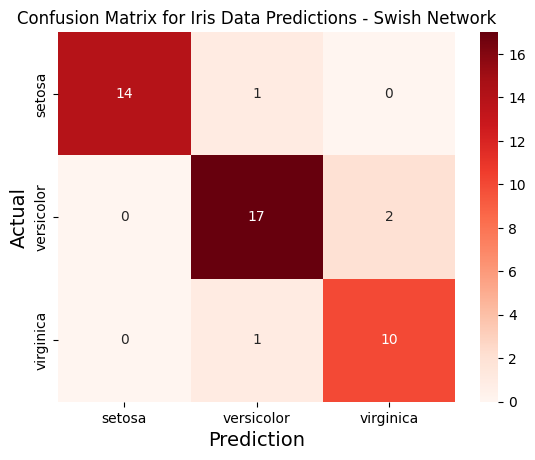

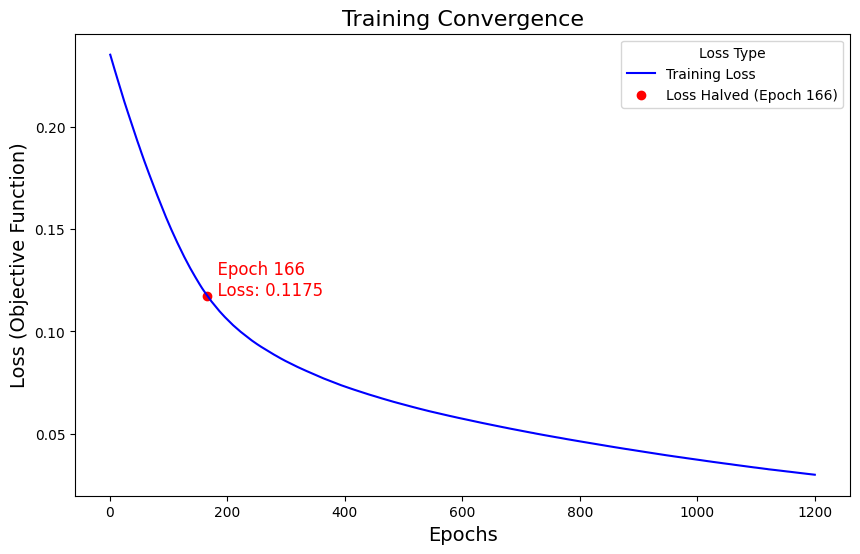

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions - Swish Network')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)


#MAKE CONVERGENCE GRAPH

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Calculate what half of initial loss is
initial_loss = history_df['loss'].iloc[0]
target_loss = initial_loss / 2

#Find epoch number where loss was halved
halved_epoch = None
for i, loss in enumerate(history_df['loss']):
    if loss <= target_loss:
        halved_epoch = history_df['epoch'].iloc[i]
        halved_loss = loss
        break

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

#Annotate epoch on graph where loss is halved
if halved_epoch:
    plt.scatter(halved_epoch, halved_loss, color='red', label=f'Loss Halved (Epoch {halved_epoch})')
    plt.text(halved_epoch, halved_loss, f"  Epoch {halved_epoch}\n  Loss: {halved_loss:.4f}", 
             color='red', fontsize=12)

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()

### Swish Summary

Our Swish model built in the same way as the previous models, except with a Swish nonlinearity, still using a Gradient Descent learning function and Mean Squared Error objective function was able to train up to 97.14% accuracy on the training data, and 97.77% accuracy on the test data. The training took 1200 epochs, with loss being decreased by 50% after 251 epochs.

The Swish model, like the ReLU models, shows significant gains over the Sigmoid model. The Swish model was able to decrease the loss by 50% nearly 6 times faster than the Sigmoid (251 epochs compared to 1491). The complete Swish training also took place over only 1200 epochs compared to the Sigmoid's 5000.

However, compared directly to a ReLU model, the Swish model performed poorly. It took nearly twice as many epochs to decrease the loss by 50% (251 epochs compared to 136), and in order to achieve a comparably high level of accuracy, the model needed to train for slightly longer than the ReLU model (1200 epochs compared to 1000).

At the onset of our use of this model, it was known that Google developed the Swish function specifically for training deep neural networks. It seems likely that due to the shallowness of our network for the Iris Dataset, the Swish model was not the more effective choice. 

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

# Further Optimization - Explore different learning algorithms

Our exploration of different nonlinearities has led us to the conclusion that for this problem, the ReLU nonlinearity appears to be the most effective. However, through experimentation with different learning algorithms, the neural network may be further optimized.

## Learning Algorithm: Root Mean Squared Propagation (RMSprop)

RMSprop is a learning algorithm that adjusts the learning rate for parameters based on the average of the squared gradients. This allows for an adaptive learning rate, and is often used when there are non-stationary objectives.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

model = Sequential()

#define Input layer
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))

#define a hidden layer
model.add(Dense(units=32, activation='relu'))

#now let's add the output layer 
    #units=3 b/c could be one of 3 flower types
model.add(Dense(units=3, activation='softmax'))  #softmax is a function good for sorting into more than two classes

# Compile the model with RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# TRAINING MODEL
from keras.callbacks import EarlyStopping

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=100, verbose=2, callbacks=[early_stopping])


Epoch 1/100


C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 259ms/step - accuracy: 0.5524 - loss: 0.1956
Epoch 2/100
4/4 - 0s - 18ms/step - accuracy: 0.7524 - loss: 0.1688
Epoch 3/100
4/4 - 0s - 18ms/step - accuracy: 0.7905 - loss: 0.1526
Epoch 4/100
4/4 - 0s - 18ms/step - accuracy: 0.8000 - loss: 0.1398
Epoch 5/100
4/4 - 0s - 19ms/step - accuracy: 0.8095 - loss: 0.1300
Epoch 6/100
4/4 - 0s - 18ms/step - accuracy: 0.8286 - loss: 0.1208
Epoch 7/100
4/4 - 0s - 19ms/step - accuracy: 0.8286 - loss: 0.1130
Epoch 8/100
4/4 - 0s - 18ms/step - accuracy: 0.8286 - loss: 0.1067
Epoch 9/100
4/4 - 0s - 21ms/step - accuracy: 0.8476 - loss: 0.1012
Epoch 10/100
4/4 - 0s - 18ms/step - accuracy: 0.8476 - loss: 0.0961
Epoch 11/100
4/4 - 0s - 18ms/step - accuracy: 0.8476 - loss: 0.0919
Epoch 12/100
4/4 - 0s - 20ms/step - accuracy: 0.8571 - loss: 0.0887
Epoch 13/100
4/4 - 0s - 18ms/step - accuracy: 0.8571 - loss: 0.0856
Epoch 14/100
4/4 - 0s - 20ms/step - accuracy: 0.8571 - loss: 0.0828
Epoch 15/100
4/4 - 0s - 18ms/step - accuracy: 0.8571 - loss: 0.0802


### Evaluate RMSProp learning with ReLU model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: [2 0 0 0 1]
Real values:
 140    2
37     0
5      0
24     0
41     0
Name: species, dtype: int64
Accuracy Score: 0.9111111111111111
Confusion Matrix:
 [[14  1  0]
 [ 0 18  1]
 [ 0  2  9]]


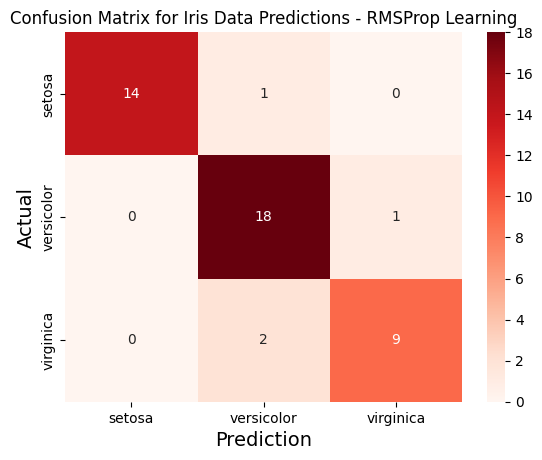

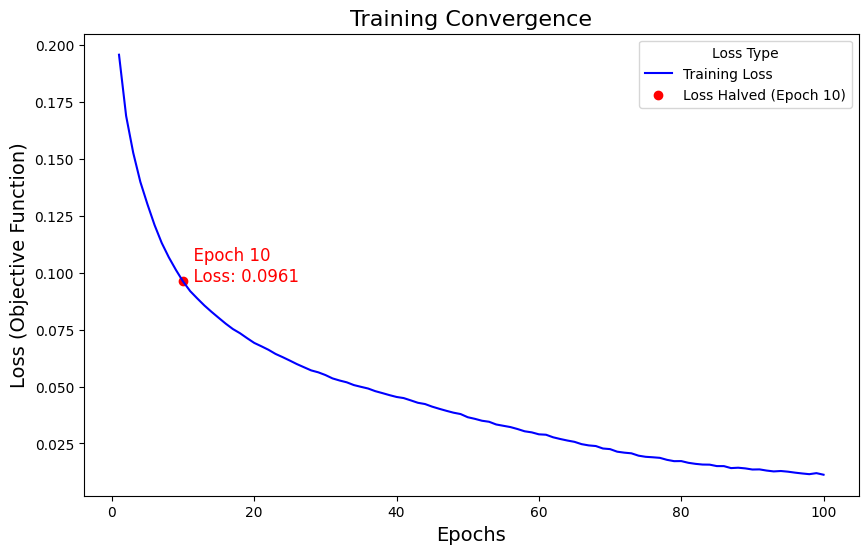

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions - RMSProp Learning')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)


#MAKE CONVERGENCE GRAPH

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Calculate what half of initial loss is
initial_loss = history_df['loss'].iloc[0]
target_loss = initial_loss / 2

#Find epoch number where loss was halved
halved_epoch = None
for i, loss in enumerate(history_df['loss']):
    if loss <= target_loss:
        halved_epoch = history_df['epoch'].iloc[i]
        halved_loss = loss
        break

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

#Annotate epoch on graph where loss is halved
if halved_epoch:
    plt.scatter(halved_epoch, halved_loss, color='red', label=f'Loss Halved (Epoch {halved_epoch})')
    plt.text(halved_epoch, halved_loss, f"  Epoch {halved_epoch}\n  Loss: {halved_loss:.4f}", 
             color='red', fontsize=12)

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()

### RMSProp Summary

The RMSProp learning function model used the ReLU nonlinearity and a Mean Squared Error objective function. The model was able to train up to 98.10% accuracy on the training data, and 95.55% accuracy on the test data. The training took 100 epochs, with loss being decreased by 50% after 11 epochs.

In direct comparison with the previous ReLU model implemented with Gradient Descent learning, the RMSProp model performed much better. It took over 10 times fewer epochs to decrease the loss by 50% (11 epochs compared to 136), and was able to achieve a comparably high level of accuracy within ten times fewer epochs (100 compared to 1000).

It should be noted that the RMSProp model did show a small, but noticeable difference between its training and test accuracy, with trainnig set accuracy of 98.10% being around 2.5% higher than the test set accuracy of 95.55%. This likely indicates a slight amount of overtraining, but an accuracy of over 95% on test data is still acceptable for the purposes of this investigation.

Like with the initial ReLU model compared to the Sigmoid, the gains offered by RMSProp over Gradient descent are clearly evident.

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

## Learning Algorithm: Adaptive Movement Estimation (Adam)

Adam is a variation on the Gradient Descent learning algorithm which computes adaptive learning rates for parameters by considering both the gradient of the mean and the variance.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam  # Import Adam optimizer

model = Sequential()

#define Input layer
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))

#define a hidden layer
model.add(Dense(units=32, activation='relu'))

#now let's add the output layer 
    #units=3 b/c could be one of 3 flower types
model.add(Dense(units=3, activation='softmax'))  #softmax is a function good for sorting into more than two classes

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# TRAINING MODEL
from keras.callbacks import EarlyStopping

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=100, verbose=2, callbacks=[early_stopping])

Epoch 1/100


C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 356ms/step - accuracy: 0.6571 - loss: 0.1879
Epoch 2/100
4/4 - 0s - 20ms/step - accuracy: 0.7048 - loss: 0.1732
Epoch 3/100
4/4 - 0s - 20ms/step - accuracy: 0.7810 - loss: 0.1596
Epoch 4/100
4/4 - 0s - 21ms/step - accuracy: 0.8286 - loss: 0.1462
Epoch 5/100
4/4 - 0s - 19ms/step - accuracy: 0.8476 - loss: 0.1345
Epoch 6/100
4/4 - 0s - 19ms/step - accuracy: 0.8762 - loss: 0.1239
Epoch 7/100
4/4 - 0s - 20ms/step - accuracy: 0.8667 - loss: 0.1146
Epoch 8/100
4/4 - 0s - 20ms/step - accuracy: 0.8667 - loss: 0.1068
Epoch 9/100
4/4 - 0s - 23ms/step - accuracy: 0.8667 - loss: 0.1005
Epoch 10/100
4/4 - 0s - 24ms/step - accuracy: 0.8762 - loss: 0.0954
Epoch 11/100
4/4 - 0s - 23ms/step - accuracy: 0.8762 - loss: 0.0915
Epoch 12/100
4/4 - 0s - 22ms/step - accuracy: 0.8667 - loss: 0.0876
Epoch 13/100
4/4 - 0s - 21ms/step - accuracy: 0.8762 - loss: 0.0846
Epoch 14/100
4/4 - 0s - 18ms/step - accuracy: 0.8762 - loss: 0.0816
Epoch 15/100
4/4 - 0s - 19ms/step - accuracy: 0.8857 - loss: 0.0789


### Evaluate Adam learning with ReLU

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: [2 0 0 0 1]
Real values:
 140    2
37     0
5      0
24     0
41     0
Name: species, dtype: int64
Accuracy Score: 0.8888888888888888
Confusion Matrix:
 [[14  1  0]
 [ 0 18  1]
 [ 0  3  8]]


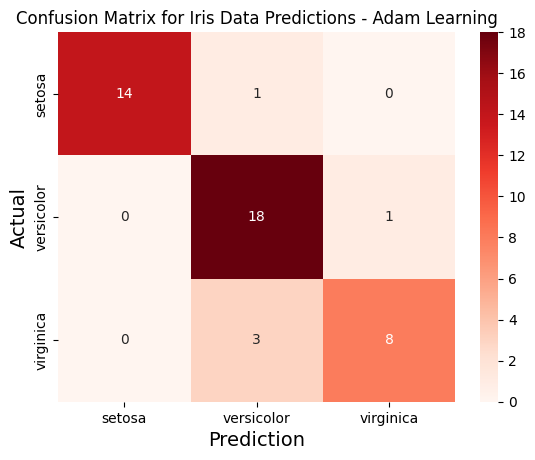

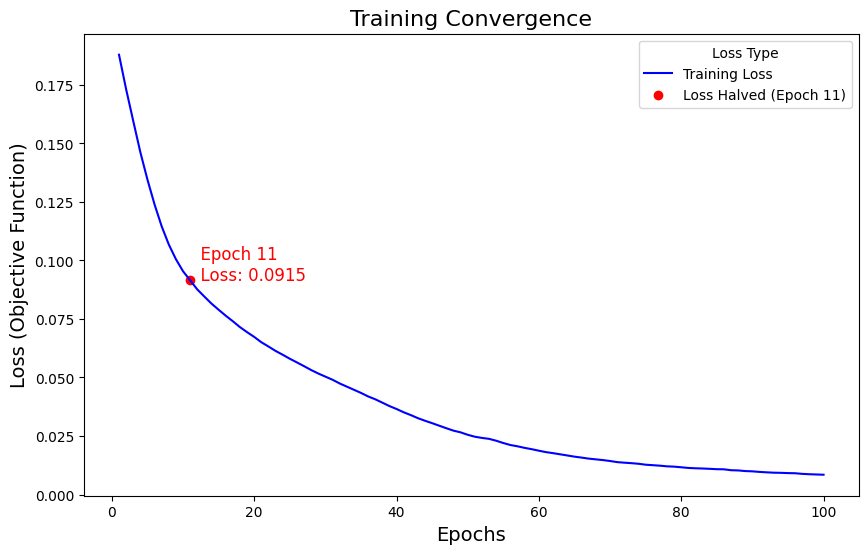

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions - Adam Learning')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)


#MAKE CONVERGENCE GRAPH

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Calculate what half of initial loss is
initial_loss = history_df['loss'].iloc[0]
target_loss = initial_loss / 2

#Find epoch number where loss was halved
halved_epoch = None
for i, loss in enumerate(history_df['loss']):
    if loss <= target_loss:
        halved_epoch = history_df['epoch'].iloc[i]
        halved_loss = loss
        break

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

#Annotate epoch on graph where loss is halved
if halved_epoch:
    plt.scatter(halved_epoch, halved_loss, color='red', label=f'Loss Halved (Epoch {halved_epoch})')
    plt.text(halved_epoch, halved_loss, f"  Epoch {halved_epoch}\n  Loss: {halved_loss:.4f}", 
             color='red', fontsize=12)

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()

### Adam Summary

The Adam learning function model used the ReLU nonlinearity and a Mean Squared Error objective function. The model was able to train up to 98.10% accuracy on the training data, and 95.55% accuracy on the test data. The training took 100 epochs, with loss being decreased by 50% after 12 epochs.

In direct comparison with the RMSProp learning algorithm, performance was nearly identical. In the training samples done for these statistics, both models achieved 98.10% training accuracy and 95.55% test accuracy over 100 epochs of training. The Adam model decreased loss by 50% over 12 epochs, while the RMSprop model decreased loss by 50% over 11 epochs.

Similarly to with the RMSProp model, there was a small, but noticeable difference between its training and test accuracy, with trainnig set accuracy of 98.10% being around 2.5% higher than the test set accuracy of 95.55%. This likely indicates a slight amount of overtraining, but an accuracy of over 95% on test data is still acceptable for the purposes of this investigation.

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

# Model Architecture Adjustment - Dropout Layer

A dropout layer is an extra layer that can be added to a neural network in order to prevent overfitting. Given that both our Adam and RMSprop models appeared to be suffering from this problem to some degree, adding a dropout layer to the model may help to improve performance. 

A dropout layer works by randomly 'dropping' a subset of the neurons in each training sample. When a neuron is 'dropped,' it outputs 0 regardless of the inputs - it is essentially deactivated. When the network is tested, the dropout layer is disabled to allow the whole network to function.

This aims to create more robust networks that will not overfit their training data.

## Model with Dropout Layer

This model adds a dropout layer to our last successful model, which used an Adam learning algorithm and ReLU nonlinearity.

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam  # Import Adam optimizer

model = Sequential()

#define Input layer
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))

#define a hidden layer
model.add(Dense(units=32, activation='relu'))

#add a dropout layer to avoid overfitting
model.add(Dropout(0.5))

#now let's add the output layer 
    #units=3 b/c could be one of 3 flower types
model.add(Dense(units=3, activation='softmax'))  #softmax is a function good for sorting into more than two classes

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# TRAINING MODEL

# Train the model without early stopping (does not work well with dropout layer)
history = model.fit(x_train, y_train, epochs=500, verbose=2)

Epoch 1/500


C:\Users\etobe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 348ms/step - accuracy: 0.4000 - loss: 0.2364
Epoch 2/500
4/4 - 0s - 22ms/step - accuracy: 0.4000 - loss: 0.2203
Epoch 3/500
4/4 - 0s - 20ms/step - accuracy: 0.5333 - loss: 0.2043
Epoch 4/500
4/4 - 0s - 18ms/step - accuracy: 0.6095 - loss: 0.1859
Epoch 5/500
4/4 - 0s - 18ms/step - accuracy: 0.6000 - loss: 0.1749
Epoch 6/500
4/4 - 0s - 18ms/step - accuracy: 0.6476 - loss: 0.1630
Epoch 7/500
4/4 - 0s - 20ms/step - accuracy: 0.7143 - loss: 0.1578
Epoch 8/500
4/4 - 0s - 20ms/step - accuracy: 0.6190 - loss: 0.1638
Epoch 9/500
4/4 - 0s - 20ms/step - accuracy: 0.6952 - loss: 0.1490
Epoch 10/500
4/4 - 0s - 23ms/step - accuracy: 0.7143 - loss: 0.1365
Epoch 11/500
4/4 - 0s - 18ms/step - accuracy: 0.7524 - loss: 0.1269
Epoch 12/500
4/4 - 0s - 18ms/step - accuracy: 0.7714 - loss: 0.1202
Epoch 13/500
4/4 - 0s - 18ms/step - accuracy: 0.7810 - loss: 0.1191
Epoch 14/500
4/4 - 0s - 18ms/step - accuracy: 0.8000 - loss: 0.1080
Epoch 15/500
4/4 - 0s - 20ms/step - accuracy: 0.7714 - loss: 0.1094


### Evaluate effectiveness of Dropout Layer

In order to evaluate the effectiveness of the dropout layer, a model using Adam learning and a ReLU nonlinearity was trained for an excessively long time (500 epochs). The goal is to demonstrate that even when attempting to intentionally overfit the model to the training data, the dropout layer helps prevent this.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction: [2 0 0 0 0]
Real values:
 140    2
37     0
5      0
24     0
41     0
Name: species, dtype: int64
Accuracy Score: 0.9333333333333333
Confusion Matrix:
 [[15  0  0]
 [ 0 18  1]
 [ 0  2  9]]


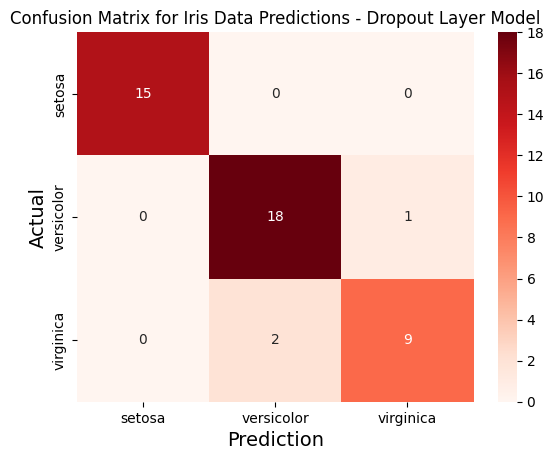

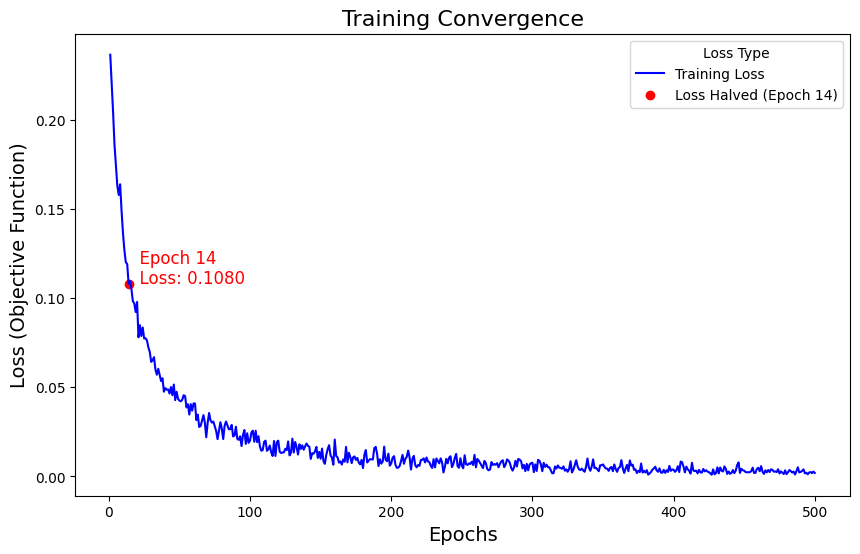

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions - Dropout Layer Model')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)


#MAKE CONVERGENCE GRAPH

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Calculate what half of initial loss is
initial_loss = history_df['loss'].iloc[0]
target_loss = initial_loss / 2

#Find epoch number where loss was halved
halved_epoch = None
for i, loss in enumerate(history_df['loss']):
    if loss <= target_loss:
        halved_epoch = history_df['epoch'].iloc[i]
        halved_loss = loss
        break

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

#Annotate epoch on graph where loss is halved
if halved_epoch:
    plt.scatter(halved_epoch, halved_loss, color='red', label=f'Loss Halved (Epoch {halved_epoch})')
    plt.text(halved_epoch, halved_loss, f"  Epoch {halved_epoch}\n  Loss: {halved_loss:.4f}", 
             color='red', fontsize=12)

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()

### Dropout Layer Summary

The Dropout Layer was implemented with the goal of creating a more robust model that would avoid overtraining. However, examining the test data outputs and the training convergence shows us that the dropout layer showed no significant gains, and may have even slightly harmed the performance of the model.

Training for 500 epochs, the model clearly overfit itself to the training data, reporting a final accuracy of 100%. This is contrasted with the 95.55% accuracy achieved on the test data, which is no better than what was achieved previously without the Dropout Layer. While it might be noted that the test results did not decrease despite the overfitting, the higher disparity between the training and test accuracy indicates that there is still an analytical discrepancy between performance during training and performance with new datasets. 

The training appeared to be noticeably slowed by the addition of the Dropout Layer as well, with loss being halved in 20 epochs, compared to the 11 epochs of the RMSprop model without a dropout layer, and the 12 epochs of the Adam model without a dropout layer.

While dropout layers may prove effective for other models to avoid overfitting, it would appear that the addition of a dropout layer in this case is not effective.

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

# Neural Networks Conclusion

Throughout this investigation of Neural Networks for categorizing the Iris Dataset, I have investigated a number of different nonlinearities and learning functions, as well as the addition of a dropout layer. A summary of the results of each model can be seen below:

### Model 1: Sigmoid Nonlinearity, Gradient Descent Learning
> Training Accuracy: 96.17% | Test Accuracy: 97.77% | 50% Loss Reduction: 1491 Epochs | Total Training Time: 5000 Epochs

### Model 2: ReLU Nonlinearity, Gradient Descent Learning
> Training Accuracy: 95.24% | Test Accuracy: 95.55% | 50% Loss Reduction: 136 Epochs | Total Training Time: 1000 Epochs

### Model 3: Leaky ReLU Nonlinearity, Gradient Descent Learning
> Training Accuracy: 96.19% | Test Accuracy: 95.55% | 50% Loss Reduction: 144 Epochs | Total Training Time: 1000 Epochs

### Model 4: Swish Nonlinearity, Gradient Descent Learning
> Training Accuracy: 97.14% | Test Accuracy: 97.77% | 50% Loss Reduction: 251 Epochs | Total Training Time: 1200 Epochs

### Model 5: ReLU Nonlinearity, RMSpop Learning
> Training Accuracy: 98.10% | Test Accuracy: 95.55% | 50% Loss Reduction: 11 Epochs | Total Training Time: 100 Epochs

### Model 6: ReLU Nonlinearity, Adam Learning
> Training Accuracy: 98.10% | Test Accuracy: 95.55% | 50% Loss Reduction: 12 Epochs | Total Training Time: 100 Epochs

### Model 7: Relu Nonlinearity, Adam Learning, Dropout Layer
> Training Accuracy: 100% | Test Accuracy: 95.55% | 50% Loss Reduction: 20 Epochs | Total Training Time: 500 Epochs

### Analysis

In our first approach, using the Sigmoid Nonlinearity and Gradient Descent Learning like in previous assignments, we were able to train an effective model. However, the training was slow and inefficient, and would likely scale poorly for more complex problems. By adjusting the nonlinearity and learning function, we were able to decrease training time from 5000 Epochs down to only 100, and decrease the time to reduce Loss by 50% from 1491 Epochs down to only 11 Epochs on our most successful model. 

These performance improvements represent a **13,554.55% decrease** in time to train away 50% of the Loss, and a **5000% decrease** in total model training time.

As a final attempt at modiffication, a dropout layer was added to one of the more successful models. The intent of the dropout layer was to combat the problem of overfitting the data during training. However, the addition of the Dropout layer was shown to slow down training, and had either no effect, or a negative effect on the overfitting issue.

# Alternate Machine Learning Algorithm: K-Means Clustering

We will now investigate a comparison of the performance of K-Means Clustering on the task of categorizing the Iris Data in comparison to the performance achieved with the Neural Network. A K-Means Clustering Model is implemented below.

Accuracy Score (K-Means): 0.7555555555555555
Confusion Matrix (K-Means):
 [[15  0  0]
 [ 0 19  0]
 [ 0 11  0]]


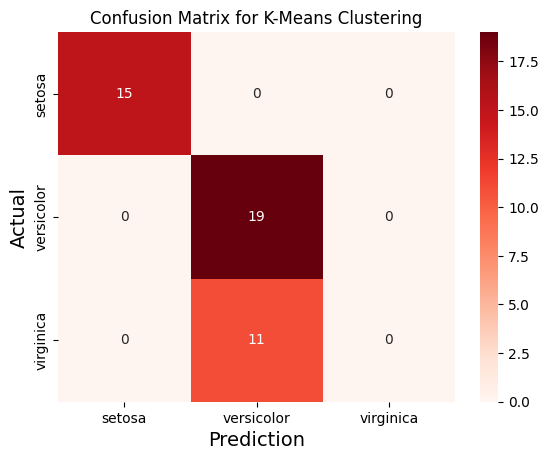

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import mode 

#Apply KMeans clustering using sklearn
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)

#Predict the cluster labels
kmeans_predictions = kmeans.predict(x_test)


#clusters must now be matched with labels (Iris Species)
#we will use the majority value within each cluster to select that cluster's label

cluster_labels = {}   # dictionary to store the most common label in each cluster
for i in range(3):
    # Find the most common real label in each cluster
    cluster_labels[i] = mode(y_test[kmeans_predictions == i])[0]

#map the predicted clusters to the actual labels
mapped_predictions = np.array([cluster_labels[cluster] for cluster in kmeans_predictions])

#evaluate accuracy and confusion matrix
accuracy = accuracy_score(y_test, mapped_predictions)
cm = confusion_matrix(y_test, mapped_predictions)

print("Accuracy Score (K-Means):", accuracy)
print("Confusion Matrix (K-Means):\n", cm)

# Plot confusion matrix as heatmap
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for K-Means Clustering')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)
plt.show()


### K-Means Clustering Summary

The K-Means Clustering Model was implemented using the same training data as was given to the Neural Network Models. After training until convergence, the K-Means Model achieved an accuracy score of 88.89% over the testing data. Upon inspection of its categorization, it can be seen that the K-Means Model was able to categorize all 17 Setosa flowers in the test set correctly, but became somewhat confused between Versicolor and Virginica flowers, miscategorizing 2 Versicolors as Virginica, and 3 Virginicas as Versicolors.

By comparison, the final most successful Neural Network Model, which used  ReLU nonlinearity and RMSpop learning function was able to achieve a 95.55% accuracy over the testing data. In fact, despite their variations in training time all 7 different Neural Network models all boasted test accuracies of 95.55% or higher, with some managing to reach 97.77%. While 88.89% is by no means innacurate, the K-Means Model over 6% less accurate than the lowest performing Neural Network models. 

In fairness to to the K-Means Clustering algorithm, it has been observed to vary in its accuracy when training the model different times. Through informal investigation, it has been seen to go as high as 90% accuracy. However, in contrast, it has been seen to drop as low as 80% accuracy - a significant decline.

Note the statistics above were sampled from one training session - retraining the data may give slightly varied results

## K-Means Clustering vs Neural Network Conclusion

While the K-Means Clustering Model was incredibly capable at differentiating linearly separable categories, such as Setosa and Versicolor, it proved only moderately effective at categorizing Versicolor compared to Virginica. All the Neural Network Models, in contrast, were able to significantly outperform K-Means Clustering by at least 6% accuracy, and at times as high as 16%. While the Neural Networks were also not perfect in their distinction of Versicolor vs Virginica, they proved to be noticeably better at it than K-Means Clustering, regardless of the type of nonlinearities and learning functions applied to the Neural Network.

K-Means Clustering is a valuable machine learning algorithm, and its partial success with this problem demonstrates its potential for use in categorization problems. However, it must be concluded that for this problem and dataset specifically, a **Neural Network model is superior** to one derived from a K-Means Clustering Algorithm.